# Sea Level Predictor

In [54]:
# External imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

%matplotlib inline

In [55]:
# Get the data from the epa-sea-level.csv file
df = pd.read_csv("epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


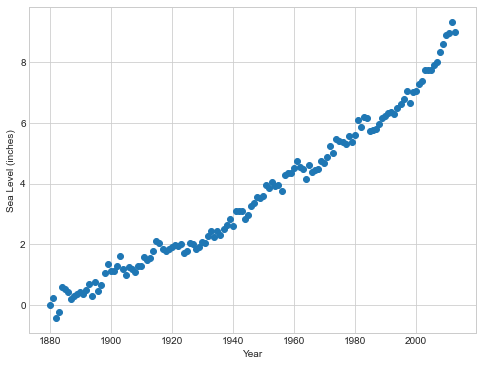

In [56]:
# Make the scatter plot of the CSIRO Adjusted Sea level
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df.Year, df["CSIRO Adjusted Sea Level"], marker='o');
ax.set(xlabel="Year", ylabel="Sea Level (inches)");

In [57]:
# External imports
from scipy import stats

# Create the a linear regression model to predict the CSIRO Adjusted Sea Level
res = stats.linregress(df.Year, df["CSIRO Adjusted Sea Level"])
print(f"R-squared: {res.rvalue**2:.6f}")
print(f"Slope: {res.slope}")
print(f"Intercept: {res.intercept}")

R-squared: 0.969747
Slope: 0.0630445840121348
Intercept: -119.06594196773978


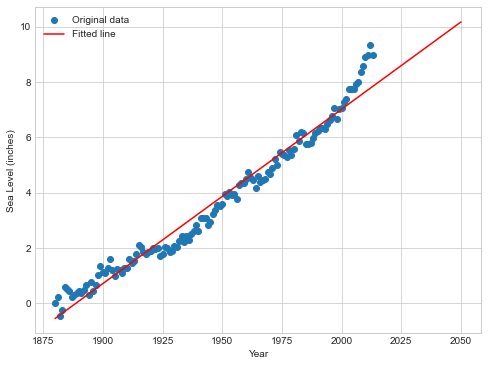

In [58]:
# Plot the model and the origin data
fig, ax = plt.subplots(figsize=(8,6))
x_future = np.arange(1880,2051)
ax.plot(df.Year, df["CSIRO Adjusted Sea Level"], 'o', label='Original data');
ax.plot(x_future, res.intercept + res.slope*x_future, 'r', label='Fitted line');
ax.set(xlabel="Year", ylabel="Sea Level (inches)");
ax.legend();


In [59]:
# Create the a linear regression model to predict the CSIRO Adjusted Sea Level using the data from the 2000 year
res = stats.linregress(df.Year[df.Year >= 2000], df["CSIRO Adjusted Sea Level"][df.Year >= 2000])
print(f"R-squared: {res.rvalue**2:.6f}")
print(f"Slope: {res.slope}")
print(f"Intercept: {res.intercept}")

R-squared: 0.953137
Slope: 0.1664272733318682
Intercept: -325.7934668059649


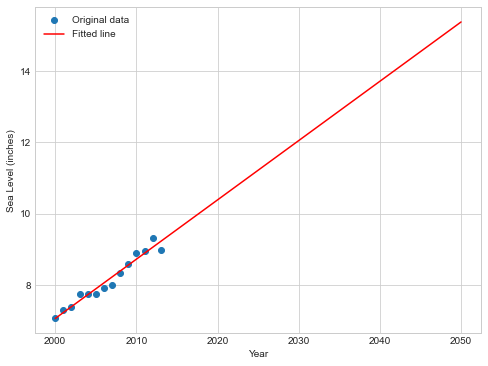

In [60]:
# Plot the model and the origin data
fig, ax = plt.subplots(figsize=(8,6))
x_future = np.arange(2000,2051)
ax.plot(df.Year[df.Year >= 2000], df["CSIRO Adjusted Sea Level"][df.Year >= 2000], 'o', label='Original data');
ax.plot(x_future, res.intercept + res.slope*x_future, 'r', label='Fitted line');
ax.set(xlabel="Year", ylabel="Sea Level (inches)");
ax.legend();
